In [2]:
import torch

print(torch.__version__)


device = "cuda" if torch.cuda.is_available() else "cpu"

2.4.0+cu121


In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
train_dataset = torchvision.datasets.MNIST(root="/content/dataset",train=True,transform=ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root="/content/dataset",train=False,transform=ToTensor(),download=True)

In [4]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: /content/dataset
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: /content/dataset
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
image,label = train_dataset[0]

In [6]:
### playing with the data
print(f"the sample of train data:{train_dataset.data[0]}|the len of training data:{len(train_dataset.data)}")
print(f"the sample of train labels:{train_dataset.targets[:10]}|the len of training labels:{len(train_dataset.targets)}")
print(f"the sample of test data:{test_dataset.data[0]}|the len of test data:{len(test_dataset.data)}")
print(f"the sample of test labels:{test_dataset.targets[:10]}|the len of training labels:{len(test_dataset.targets)}")


the sample of train data:tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   

In [7]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

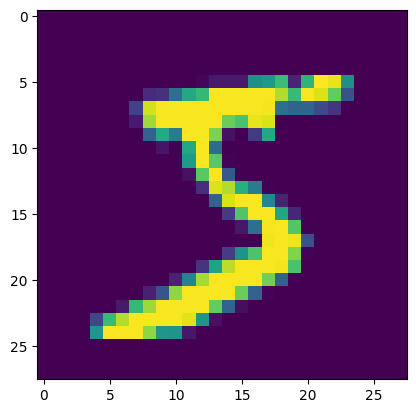

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0])
plt.axis = False;

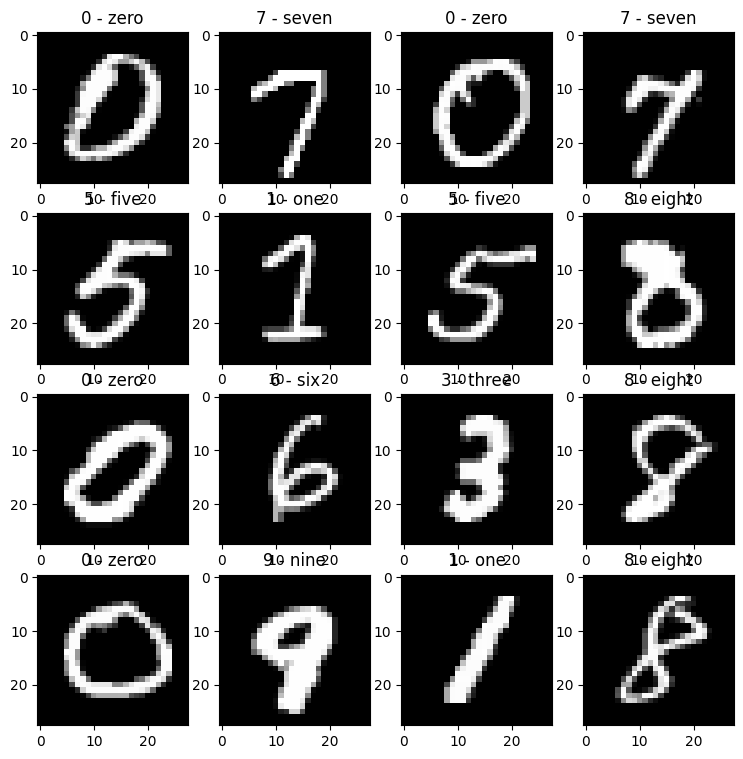

In [9]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])


In [10]:
from torch.utils.data import DataLoader

In [11]:
BATCH_SIZE = 32
# making a dataloader for training so that it becomes iterable
train_dataloader = DataLoader(train_dataset,batch_size = BATCH_SIZE,shuffle=True)

test_dataloader = DataLoader(test_dataset,batch_size = BATCH_SIZE,shuffle=False)

In [12]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7857defd7700>, <torch.utils.data.dataloader.DataLoader object at 0x7857deed8250>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
import torch.nn as nn

In [14]:
class TinyVGG(nn.Module):
  def __init__(self):
    super().__init__()

    self.block1 =nn.Sequential(
        #in_channels=1 argument in nn.Conv2d is used because the MNIST images are grayscale.
        nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10,out_channels=10,kernel_size=3,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=1210,
                      out_features=10)
    )
  def forward(self, x: torch.Tensor):
      x = self.block1(x)
      # print(x.shape)
      x = self.block2(x)
      # print(x.shape)
      x = self.classifier(x)
      # print(x.shape)
      return x
      """
      Input shape: [1, 28, 28] (1 channel, 28x28 image)
Block 1:

Conv2d: [10, 26, 26] (kernel_size=3 reduces dimensions by 2)
ReLU: [10, 26, 26] (doesn't change shape)
Conv2d: [10, 24, 24]


Block 2:

Conv2d: [10, 22, 22]
ReLU: [10, 22, 22]
MaxPool2d: [10, 11, 11] (halves dimensions)


Classifier:

Flatten: [1210] (10 * 11 * 11 = 1210)
Linear: Expects in_features= 1210
      """

model0 = TinyVGG().to(device)
print(model0)

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1210, out_features=10, bias=True)
  )
)


In [15]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [17]:
### training
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model0.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model0(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model0.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model0(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.049 | Test loss: 0.050
Epoch: 1 | Loss: 0.041 | Test loss: 0.053
Epoch: 2 | Loss: 0.038 | Test loss: 0.069
Epoch: 3 | Loss: 0.035 | Test loss: 0.045
Epoch: 4 | Loss: 0.031 | Test loss: 0.047
CPU times: user 54.6 s, sys: 398 ms, total: 55 s
Wall time: 57.2 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

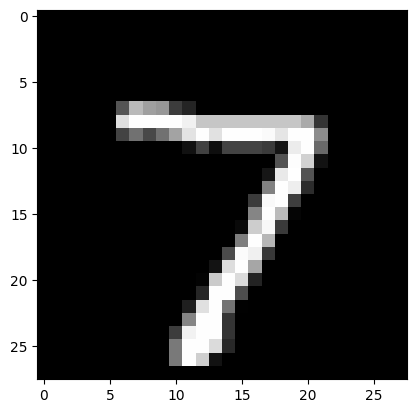

In [19]:
plt.imshow(test_dataset[0][0].squeeze(), cmap="gray")

In [21]:
model_pred_logits = model0(test_dataset[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

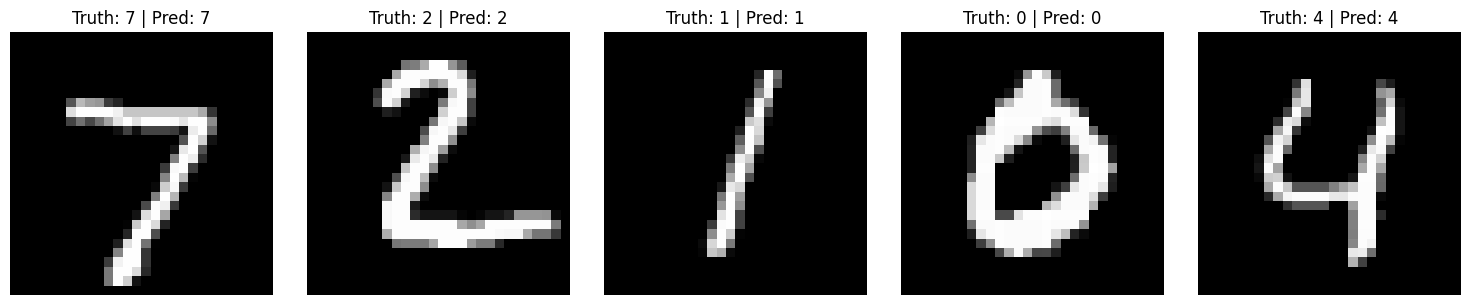

In [23]:
import matplotlib.pyplot as plt

num_to_plot = 5
fig, axes = plt.subplots(1, num_to_plot, figsize=(15, 3))

for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_dataset[i][0]
    label = test_dataset[i][1]

    # Make prediction on image
    model_pred_logits = model0(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    axes[i].imshow(img.squeeze(), cmap="gray")
    axes[i].set_title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [27]:
# Make predictions across all test data
from tqdm.auto import tqdm
model0.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model0(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

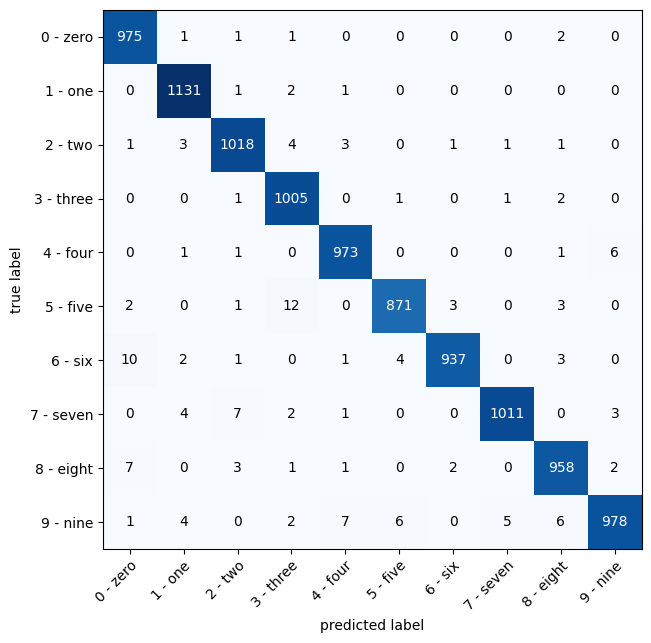

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_dataset.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)